In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import copy
from astropy.io import fits
import lightkurve as lk

from EightBitTransit.cTransitingImage import TransitingImage
from EightBitTransit.inversion import *
from EightBitTransit.misc import *

import scipy.interpolate as interp

%matplotlib inline

0.0006149042851666919


<Figure size 432x288 with 0 Axes>

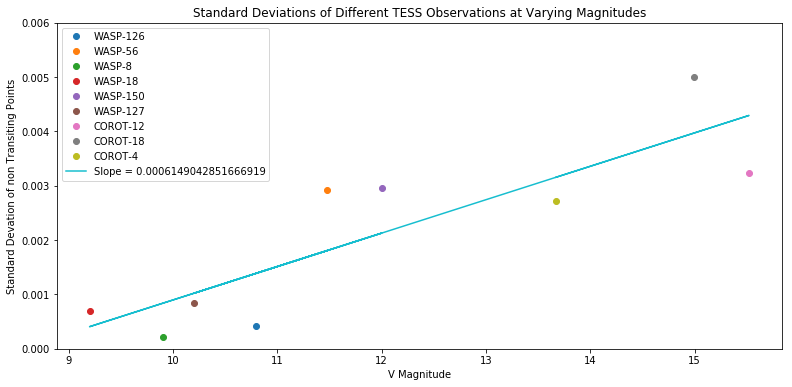

In [81]:
# characterize noise as standard dev in a plot
h0 = fits.open('reference_planet_WASP126.fits') #10.8 mag
time0 = h0[1].data['TIME'][:800]
LC0 = h0[1].data['FLUX'][:800]
st0 = np.std(LC0)
mag0 = 10.8
name0 = "WASP-126"

h1 = fits.open('reference_planet_WASP-56_11.48.fits')
time1 = h1[1].data['TIME'][:800]
LC1 = h1[1].data['FLUX'][:800]
st1 = np.std(LC1)
mag1 = 11.48
name1 = "WASP-56"

h2 = fits.open('reference_planet_WASP-8_9.9.fits')
time2 = h2[1].data['TIME'][:300]
LC2 = h2[1].data['FLUX'][:300]
st2 = np.std(LC2)
mag2 = 9.9
name2 = "WASP-8"

h3 = fits.open('reference_planet_WASP-18_9.2.fits')
time3 = h3[1].data['TIME'][:800]
LC3 = h3[1].data['FLUX'][:800]
st3 = np.std(LC3)
mag3 = 9.2
name3 = "WASP-18"

h4 = fits.open('reference_planet_WASP-150_12.0.fits')
time4 = h4[1].data['TIME'][:800]
LC4 = h4[1].data['FLUX'][:800]
st4 = np.std(LC4)
mag4 = 12.0
name4 = "WASP-150"

h5 = fits.open('reference_planet_WASP-127_10.2.fits')
time5 = h5[1].data['TIME'][1050:1300]
LC5 = h5[1].data['FLUX'][1050:1300]
st5 = np.std(LC5)
mag5 = 10.2
name5 = "WASP-127"

h6 = fits.open('reference_planet_COROT-12_15.52.fits')
time6 = h6[1].data['TIME'][:1300]
LC6 = h6[1].data['FLUX'][:1300]
st6 = np.std(LC6)
mag6 = 15.52
name6 = "COROT-12"

h7 = fits.open('reference_planet_COROT-18_14.99.fits')
time7 = h7[1].data['TIME'][:1300]
LC7 = h7[1].data['FLUX'][:1300]
st7 = np.std(LC7)
mag7 = 14.99
name7 = "COROT-18"

h8 = fits.open('reference_planet_COROT-4_13.67.fits')
time8 = h8[1].data['TIME'][:1300]
LC8 = h8[1].data['FLUX'][:1300]
st8 = np.std(LC8)
mag8 = 13.67
name8 = "COROT-4"

mags = np.array([mag0, mag1, mag2, mag3, mag4, mag5, mag6, mag7, mag8])
stds = [st0, st1, st2, st3, st4, st5, st6, st7, st8]
m, b = np.polyfit(mags, stds, 1)
print(m)

plt.clf()
plt.figure(figsize=(13,6))
plt.ylim(0, 0.006)
plt.title("Standard Deviations of Different TESS Observations at Varying Magnitudes")
plt.xlabel("V Magnitude")
plt.ylabel("Standard Devation of non Transiting Points")
plt.plot(mag0, st0, 'o',label=name0)
plt.plot(mag1, st1, 'o',label=name1)
plt.plot(mag2, st2, 'o',label=name2)
plt.plot(mag3, st3, 'o',label=name3)
plt.plot(mag4, st4, 'o',label=name4)
plt.plot(mag5, st5, 'o',label=name5)
plt.plot(mag6, st6, 'o',label=name6)
plt.plot(mag7, st7, 'o',label=name7)
plt.plot(mag8, st8, 'o',label=name8)
plt.plot(mags, m*mags + b, '-', label="Slope = "+str(m))
plt.legend()
plt.show()


In [22]:
hdul = fits.open('reference_planet_WASP-56_11.48.fits')
mag = "11.48"

In [25]:
time = hdul[1].data['TIME']
truth_LC = hdul[1].data['FLUX']
LC_err = hdul[1].data['FLUX_ERR']

LC = hdul[1].data['FLUX'][0:800]
time = hdul[1].data['TIME'][0:800]
err = hdul[1].data['FLUX_ERR'][0:800]

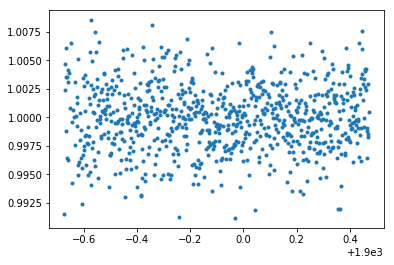

In [26]:
plt.plot(time, LC, '.')

/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


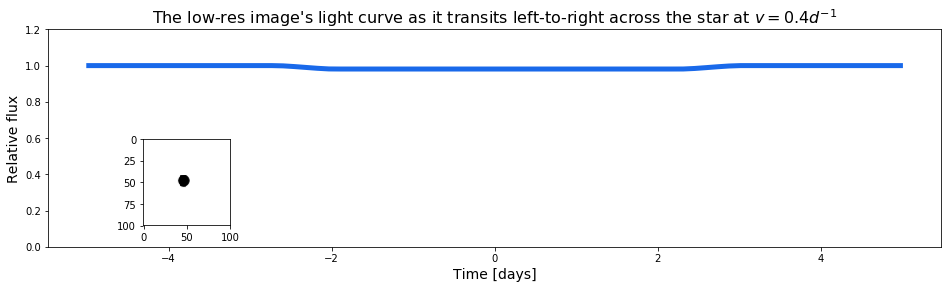

In [27]:
times = np.linspace(-35.,35.,500)
planet_lowres_SItitle = TransitingImage(imfile="/Users/piperfrances/BSRC/code/ref_planet_larger.png",
                                    lowres=100,
                                    lowrestype="mean", # Calculate the lower-resolution version of the image by averaging "neighborhoods" of pixels in the high-res image.
                                    lowresround=False, # Let the resulting low-res pixel values take on intermediate values between 0 and 1, i.e. don't round them to 0 or 1.
                                    v=0.4,
                                    t_ref=0.,
                                    t_arr=times)
#lowres_SItitle.plot_grid()
#print np.shape(lowres_SItitle.opacitymat)
    
planet_lowres_SItitle_LC, overlapTimes = planet_lowres_SItitle.gen_LC(t_arr=times) 
    
fig, ax = plt.subplots(1,1,figsize=(16,4))
ax = plt.axes()
ax.plot(overlapTimes,planet_lowres_SItitle_LC,color="#1969ea",ls="-",lw=5)
ax.set_ylim(0.0,1.2)
plt.xlabel("Time [days]",fontsize=14)
plt.ylabel("Relative flux",fontsize=14)
plt.title(r"The low-res image's light curve as it transits left-to-right across the star at $v = 0.4 d^{-1}$",fontsize=16)
ax1 = plt.axes([.095, .2, 0.3, 0.3])
ax1.imshow(planet_lowres_SItitle.opacitymat,cmap="Greys",aspect="equal",origin="upper",interpolation='none',vmin=0.,vmax=1.)
#filename = "/Users/piperfrances/BSRC/code/results_subtract_artifacts/1"
#plt.savefig(filename, fmt="png")
plt.show()
plt.close()

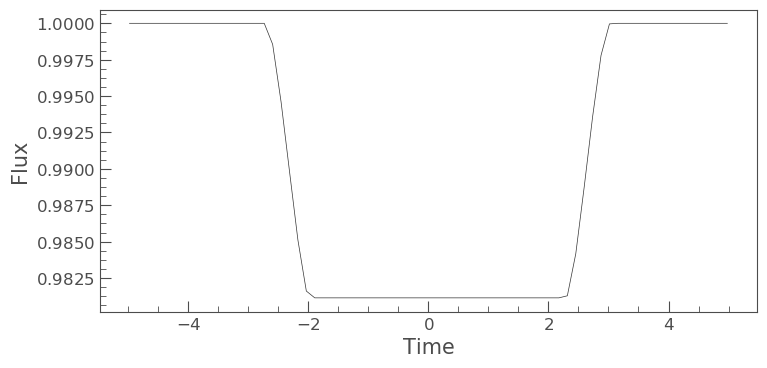

In [28]:
# making noisy

# first, make a lightkurve object
artif_LC = lk.LightCurve(time = overlapTimes, flux = planet_lowres_SItitle_LC)
artif_LC.plot()

In [29]:
# interpolating the smaller array
planet_interp_LC = interp.interp1d(np.arange(planet_lowres_SItitle_LC.size),planet_lowres_SItitle_LC)
planet_LC_stretch = planet_interp_LC(np.linspace(0,planet_lowres_SItitle_LC.size-1,LC.size))

In [30]:
# making noisy! 
planet_noisy_LC = planet_LC_stretch * LC

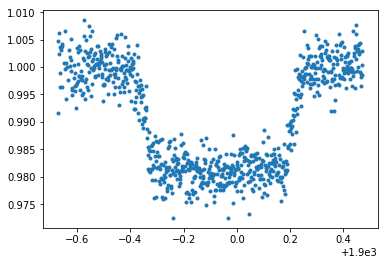

In [31]:
plt.plot(time, planet_noisy_LC, '.')

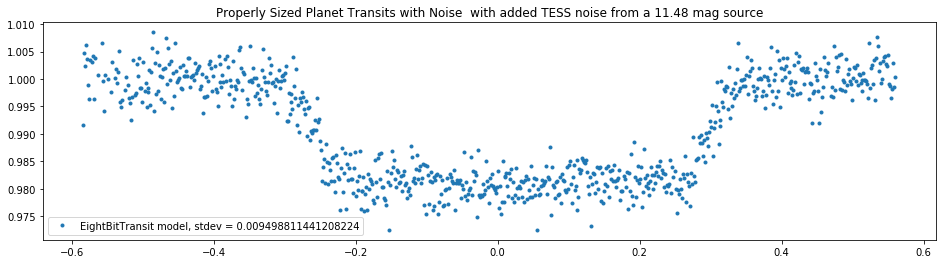

In [32]:
plt.figure(figsize=(16,4))
sdev = np.std(planet_noisy_LC)
plt.plot(time-time[int(time.size/2)], planet_noisy_LC, '.', label="EightBitTransit model, stdev = "+str(sdev))
plt.title("Properly Sized Planet Transits with Noise  with added TESS noise from a "+mag+" mag source")
plt.legend()
plt.show()

In [34]:
# saving!! skip this cell if you don't want to save as a fits file
planetLC = lk.LightCurve(flux=planet_noisy_LC, time=time, flux_err=err)
planetLC.to_fits(path="/Users/piperfrances/BSRC/code/large_planet.fits")

IOError: File '/Users/piperfrances/BSRC/code/large_planet.fits' already exists.

/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


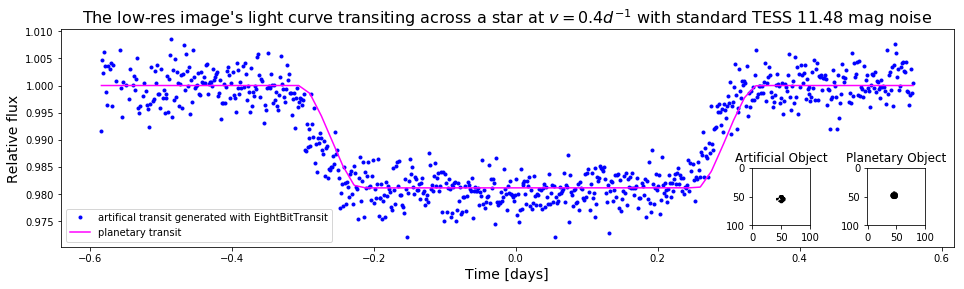

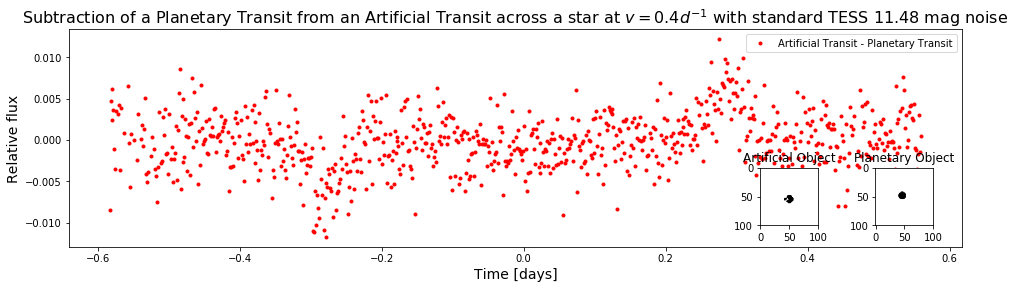

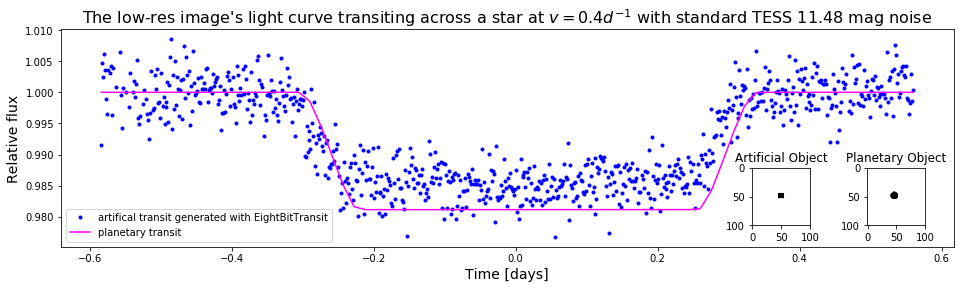

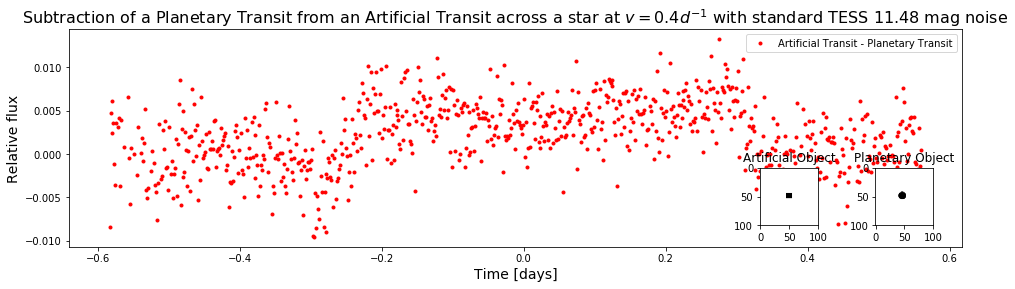

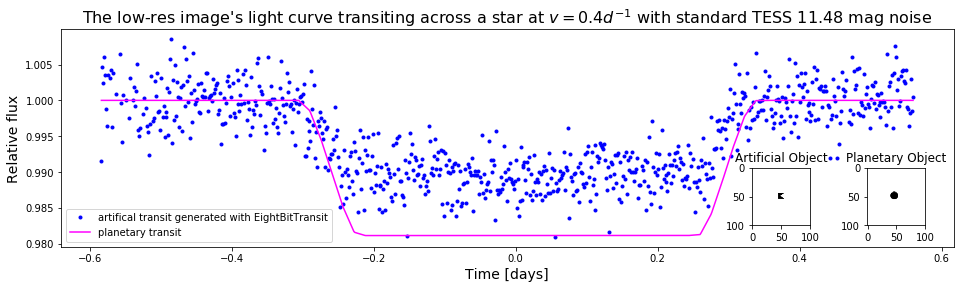

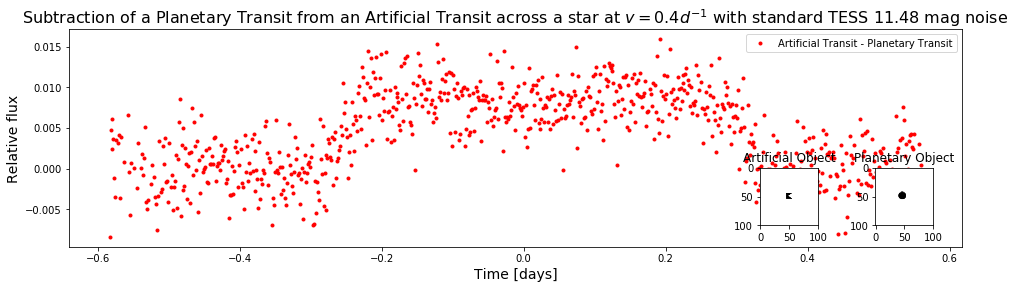

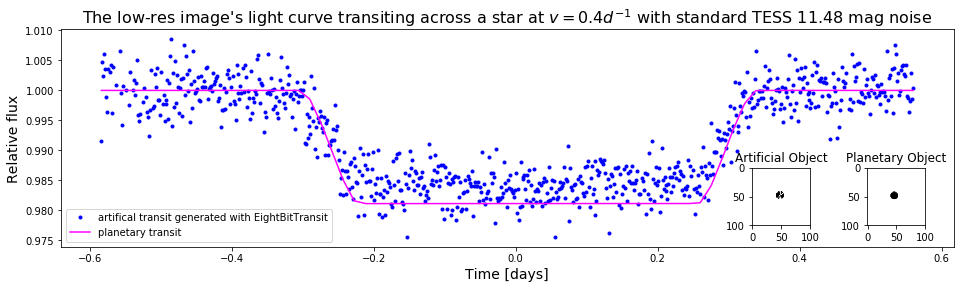

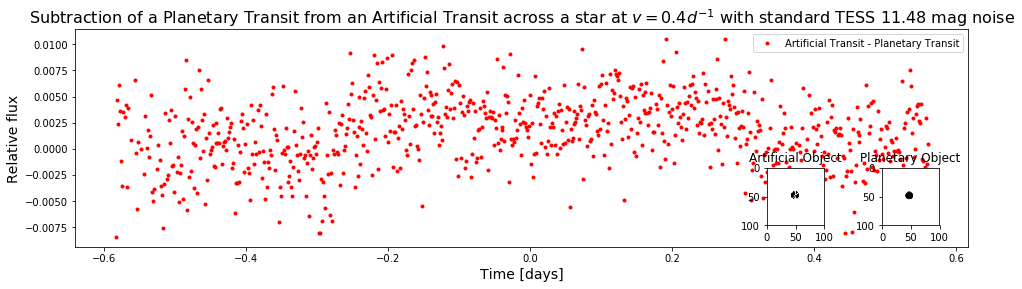

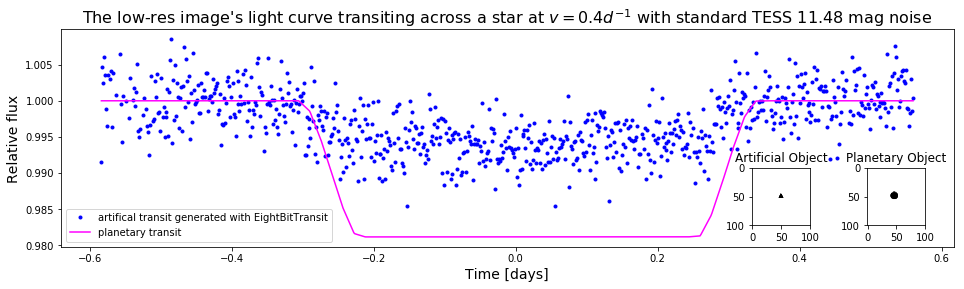

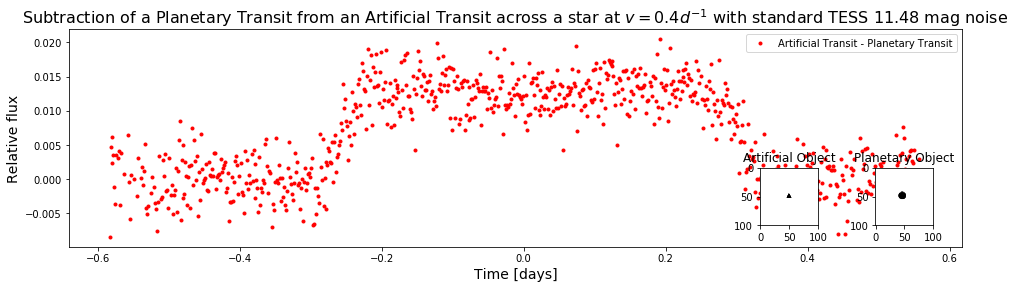

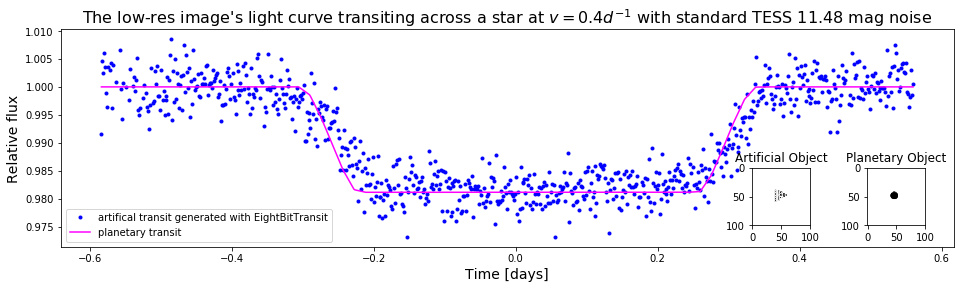

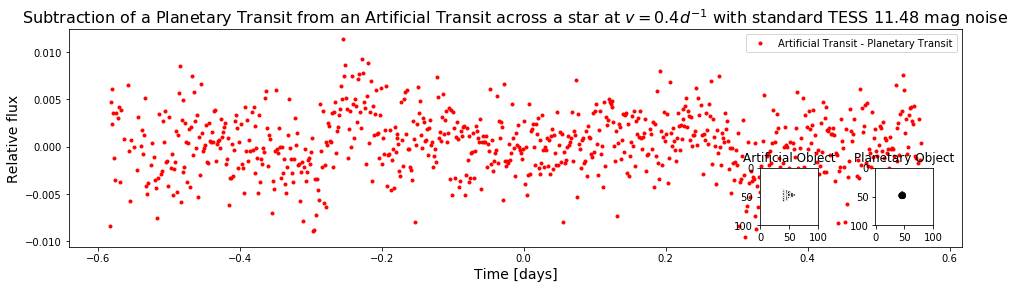

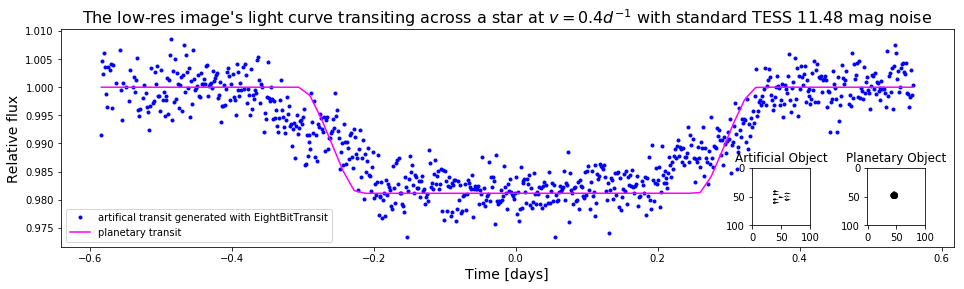

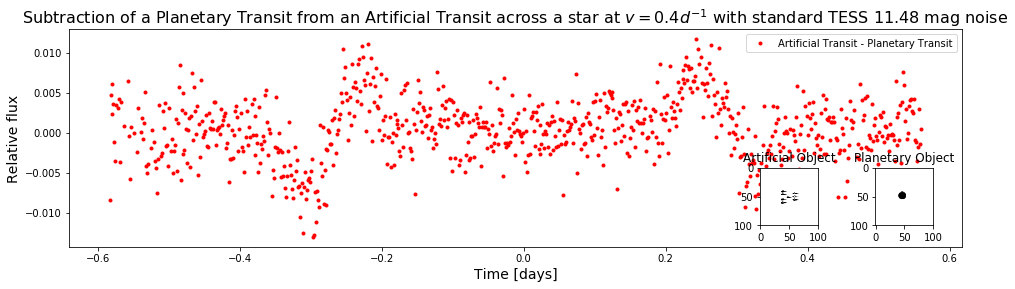

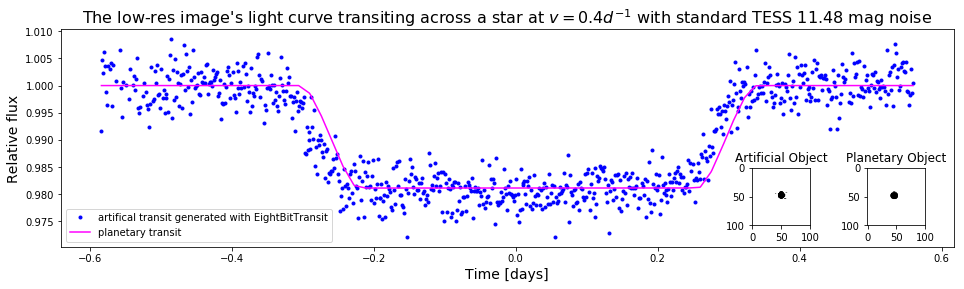

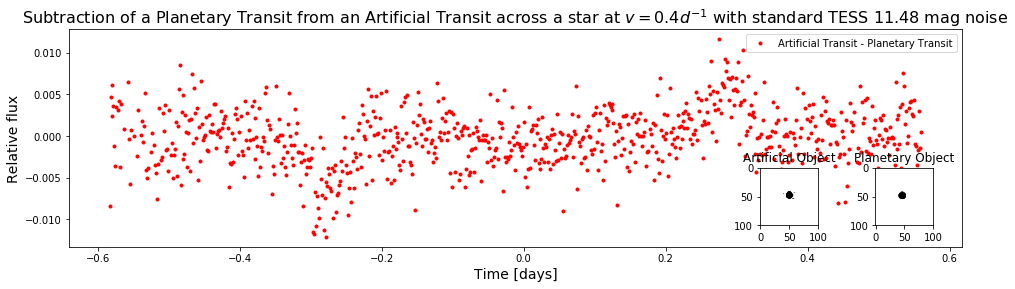

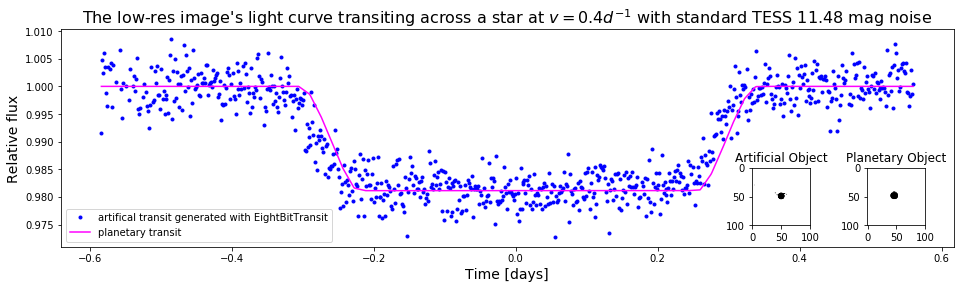

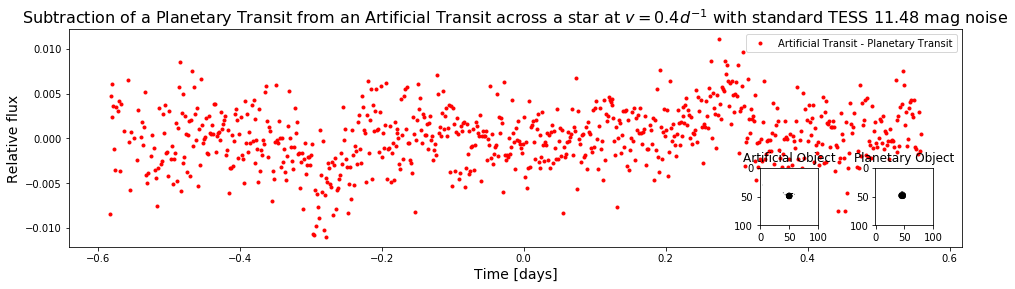

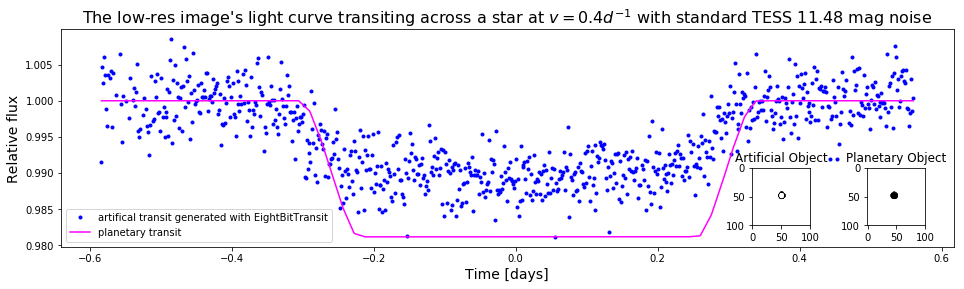

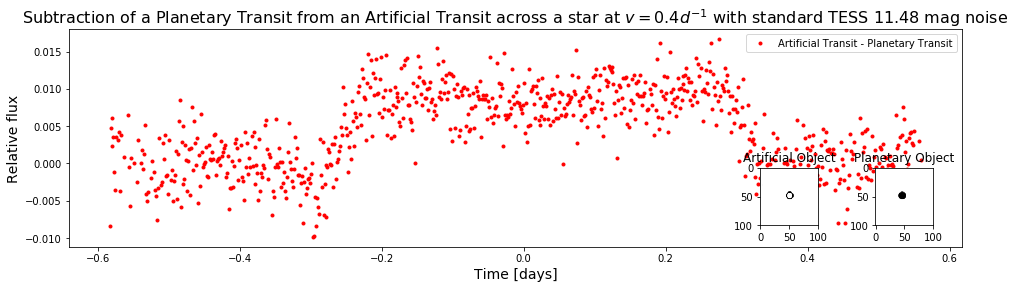

In [37]:
# Now more artifacts!

i = 1
# names has 15 items
# artifacts has 10
while i < 11:
    times = np.linspace(-35.,35.,500)

    # create a TransitingImage object, which reads in an image file and converts it into a matrix of pixels
    # transiting the star at velocity v [days**-1], with reference time t_ref [days]
#     SItitle = TransitingImage(imfile="/Users/piperfrances/BSRC/EightBitTransit/names/"+str(i)+".png",
#                               v=0.4,
#                               t_ref=0.,
#                               t_arr=times)
    #SItitle.plot_grid()
    #print np.shape(SItitle.opacitymat) # the pixelated image grid. Notice that this is very high-resolution, so the 
                                       # light curve calculation in the next cell would be slow.

    # We can speed up the light curve calculation by specifying a lower image resolution, e.g. 20 pixels in height.
    # The image aspect ratio will not change.
    lowres_SItitle = TransitingImage(imfile="/Users/piperfrances/BSRC/code/artifacts/"+str(i)+".png",
                                     lowres=100,
                                     lowrestype="mean", # Calculate the lower-resolution version of the image by averaging "neighborhoods" of pixels in the high-res image.
                                     lowresround=False, # Let the resulting low-res pixel values take on intermediate values between 0 and 1, i.e. don't round them to 0 or 1.
                                     v=0.4,
                                     t_ref=0.,
                                     t_arr=times)
    #lowres_SItitle.plot_grid()
    #print np.shape(lowres_SItitle.opacitymat)
    
    lowres_SItitle_LC, overlapTimes = lowres_SItitle.gen_LC(t_arr=times) 
    
    interp_LC = interp.interp1d(np.arange(lowres_SItitle_LC.size),lowres_SItitle_LC)
    LC_stretch = interp_LC(np.linspace(0,lowres_SItitle_LC.size-1,LC.size))
    
    # making noisy! 
    noisy_LC = LC_stretch * LC
    
    fig, ax = plt.subplots(1,1,figsize=(16,4))
    ax = plt.axes()
    ax.plot(time-time[400],noisy_LC,'.',color="blue",label = "artifical transit generated with EightBitTransit")
    ax.plot(time-time[400],planet_LC_stretch,'-',color="magenta",label = "planetary transit")
    plt.xlabel("Time [days]",fontsize=14)
    plt.ylabel("Relative flux",fontsize=14)
    plt.title(r"The low-res image's light curve transiting across a star at $v = 0.4 d^{-1}$ with standard TESS " + mag + " mag noise",fontsize=16)
    ax1 = plt.axes([.65, .2, 0.2, 0.2])
    ax1.imshow(lowres_SItitle.opacitymat,cmap="Greys",aspect="equal",origin="upper",interpolation='none',vmin=0.,vmax=1.)
    ax1.set_title("Artificial Object")
    ax3 = plt.axes([.75, .2, 0.2, 0.2])
    ax3.imshow(planet_lowres_SItitle.opacitymat,cmap="Greys",aspect="equal",origin="upper",interpolation='none',vmin=0.,vmax=1.)
    ax3.set_title("Planetary Object")
    ax.legend()
    filename = "/Users/piperfrances/BSRC/code/result_noisy_artifacts/"+str(i)
    plt.savefig(filename, fmt="png")
    plt.show()
    plt.close()
    
    #subtracted plots
    sub_LC = noisy_LC - planet_LC_stretch
    fig, ax = plt.subplots(1,1,figsize=(16,4))
    ax = plt.axes()
    ax.plot(time-time[400],sub_LC,'.',color="red",label = "Artificial Transit - Planetary Transit")
    plt.xlabel("Time [days]",fontsize=14)
    plt.ylabel("Relative flux",fontsize=14)
    plt.title(r"Subtraction of a Planetary Transit from an Artificial Transit across a star at $v = 0.4 d^{-1}$ with standard TESS " + mag + " mag noise",fontsize=16)
    ax1 = plt.axes([.65, .2, 0.2, 0.2])
    ax1.imshow(lowres_SItitle.opacitymat,cmap="Greys",aspect="equal",origin="upper",interpolation='none',vmin=0.,vmax=1.)
    ax1.set_title("Artificial Object")
    ax3 = plt.axes([.75, .2, 0.2, 0.2])
    ax3.imshow(planet_lowres_SItitle.opacitymat,cmap="Greys",aspect="equal",origin="upper",interpolation='none',vmin=0.,vmax=1.)
    ax3.set_title("Planetary Object")
    ax.legend()
    filename = "/Users/piperfrances/BSRC/code/result_noisy_artifacts/sub_"+str(i)
    plt.savefig(filename, fmt="png")
    plt.show()
    plt.close()
    
    
    
    i += 1